# Метод Ритца

In [88]:
import matplotlib.pyplot as plot
from scipy.integrate import quad
from scipy.linalg import solve
import numpy as np

In [89]:
def RitzMethod(rho, q, f, mu, N, left=0, right=1):
    phi_i = lambda x, i: np.sin(np.pi * i * x / 2)
    dphi_i = lambda x, i: (np.pi * i / 2) * np.cos(np.pi * i * x / 2)
    
    A = np.zeros((N, N))
    b = np.zeros(N)
    for i in range(N):
        b[i], _ = quad(lambda x: f(x) * phi_i(x, i+1), left, right)
        b[i] += rho(1) * mu * phi_i(1, i+1)
        for n in range(N):
            integral_A, _ = quad(lambda x: rho(x) * dphi_i(x, i+1) * dphi_i(x, n+1) + q(x) * phi_i(x, i+1) * phi_i(x, n+1), left, right)
            A[n, i] = integral_A + rho(1) * phi_i(1, i+1) * phi_i(1, n+1)
    
    c = solve(A, b)
    
    x_vals = np.arange(left, right, 0.01)
    y_vals = np.zeros_like(x_vals)
    for i in range(N):
        y_vals += c[i] * phi_i(x_vals, i+1)
        
    return x_vals, y_vals

In [90]:
rho = lambda x: (2 - x) ** 2
q = lambda x: 0
f = lambda x: (np.pi**2 / 4) * (2 - x) * np.sin(np.pi * x / 2)

mu = 2
b1, b2 = 0, 1
N = 4  # Число базисных функций

solution = lambda x: np.sin(np.pi * x / 2) / (2 - x)

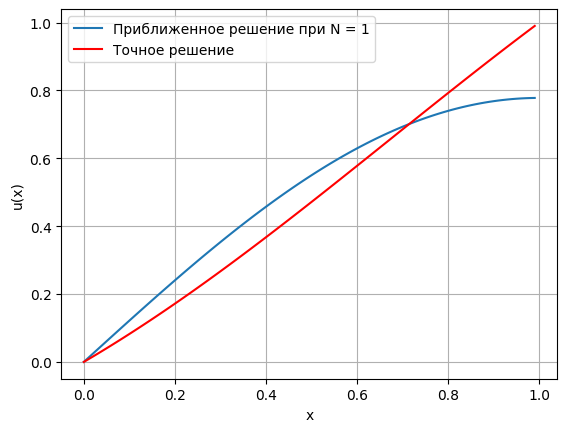

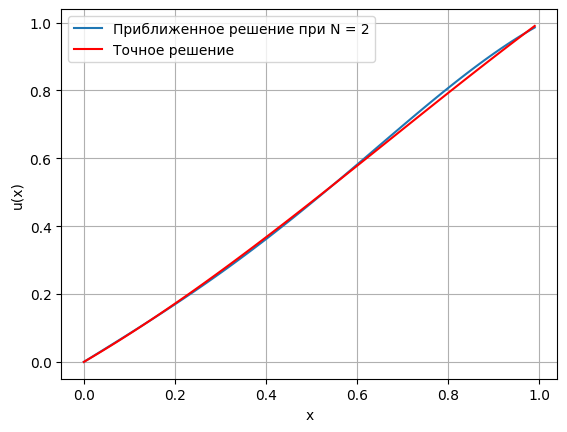

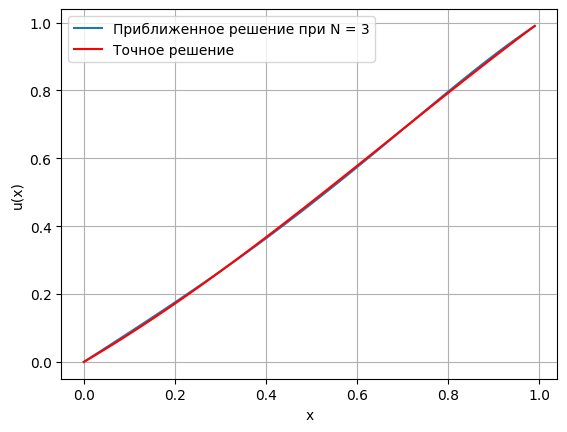

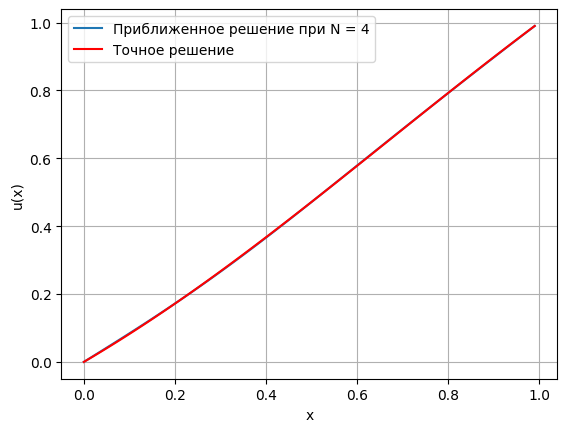

In [91]:
for i in range(1, N + 1):
    x_vals, y_vals = RitzMethod(rho, q, f, mu, i, left=b1, right=b2)
    plot.plot(x_vals, y_vals, label=f'Приближенное решение при N = {i}')
    plot.plot(x_vals, solution(x_vals), 'r', label='Точное решение')
    plot.xlabel('x')
    plot.ylabel('u(x)')
    plot.legend()
    plot.grid()
    plot.show()